In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel("E:\My_Files\DATA_SCIENCE_SET_25_26.xlsx",sheetname="Sheet1",parse_dates = [3],na_values="0")

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [3]:
#Renaming columns
data=data.rename(columns={"User id":"User_id","Order Date":"Ordered_Date","Order Time":"Ordered_Time","bill value":"Bill_Amount","Home Address":"Home_Address","Office Address":"Office_Address","Family members":"Family_Members","Languages Known":"Languages_Known"})

In [4]:
data.head()

,User_id,Category,Product,Ordered_Date,Ordered_Time,Bill_Amount,Age,Income,Gender,Profession,Home_Address,Office_Address,Family_Members,Languages_Known
0,9123456794,11,4.0,2018-01-01 00:00:00,21:30:00,2000,26,45000,Female,Doctor,"17.4886661,78.3897115,17z(J.N.T.U)","17.4743872,78.2975193,14z(Serilingampally)",7,"Malyalam,Telugu and English"
1,9999999978,6,NaN,2018-01-04 00:00:00,22:55:00,2650,30,22000,Female,Entreprenuer,"17.400205, 78.487070","17.408753, 78.438758",2,"English, Telugu"
2,9123456782,8,8.0,2018-01-10 00:00:00,14:12:00,25000,24,50000,Female,Engineer,"17.5182524,78.4732573,13z(Bolarum)","17.3722658,78.48243,15z(Malakpet)",4,"Tamil,English and Telugu"
3,9999999975,13,NaN,2018-01-12 00:00:00,10:10:00,750,24,23000,Female,IT Professional,"17.424879, 78.507825","17.485128, 78.511785",5,"English, Telugu"
4,9123456790,9,1.0,2018-01-21 00:00:00,13:40:00,8700,28,60000,Female,Business,"17.4439716,78.3047549,13z(Gachibowli)","17.4963186,78.5403209,14z(Sainikpuri)",4,Telugu and English


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 14 columns):
User_id            220 non-null int64
Category           220 non-null int64
Product            63 non-null float64
Ordered_Date       220 non-null object
Ordered_Time       220 non-null object
Bill_Amount        220 non-null int64
Age                220 non-null int64
Income             220 non-null int64
Gender             220 non-null object
Profession         220 non-null object
Home_Address       220 non-null object
Office_Address     177 non-null object
Family_Members     220 non-null int64
Languages_Known    220 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 24.1+ KB


In [6]:
data.describe()

,User_id,Category,Product,Bill_Amount,Age,Income,Family_Members
count,2.200000e+02,220.000000,63.000000,220.000000,220.000000,220.000000,220.000000
mean,9.672727e+09,6.881818,4.857143,3270.518182,30.150000,30359.090909,4.104545
std,4.256123e+08,4.263537,2.787398,6055.698128,11.645849,19188.637217,1.986938
min,9.000000e+09,1.000000,1.000000,15.000000,13.000000,0.000000,1.000000
25%,9.123457e+09,2.000000,2.000000,546.750000,23.000000,22000.000000,3.000000
50%,1.000000e+10,6.000000,5.000000,1500.000000,26.000000,30000.000000,4.000000
75%,1.000000e+10,11.000000,7.000000,3000.000000,32.000000,45000.000000,5.000000
max,1.000000e+10,14.000000,11.000000,50000.000000,62.000000,100000.000000,8.000000


In [7]:
data.isnull().sum()

User_id              0
Category             0
Product            157
Ordered_Date         0
Ordered_Time         0
Bill_Amount          0
Age                  0
Income               0
Gender               0
Profession           0
Home_Address         0
Office_Address      43
Family_Members       0
Languages_Known      0
dtype: int64

### Data Preprocessing

In [8]:
#data.User_id.value_counts().sort_index()
data.shape

(220, 14)

### Needs vs Luxury

In [9]:
data.Income.value_counts().sort_index()

0         31
6000       6
15000      1
16000      6
20000      6
22000     12
23000     14
25000     15
28000      2
30000     46
35000      3
37000      8
38000      2
40000      1
42000      4
45000     30
50000     20
60000      5
75000      3
85000      3
100000     2
Name: Income, dtype: int64

In [10]:
data.Income.loc[data.Income==0]=np.round(data.Income.mean(),2)
data.iloc[[31,32,48,50,51,53]]

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,User_id,Category,Product,Ordered_Date,Ordered_Time,Bill_Amount,Age,Income,Gender,Profession,Home_Address,Office_Address,Family_Members,Languages_Known
31,9999999986,13,NaN,2018-02-27 00:00:00,18:03:00,500,13,30359.09,Male,Student,"17.496305, 78.407876",NaN,3,English
32,9999999986,13,NaN,2018-02-28 00:00:00,19:10:00,500,13,30359.09,Male,Student,"17.496305, 78.407876",NaN,3,English
48,9999999987,14,NaN,2018-03-27 00:00:00,12:45:00,600,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"
50,9999999987,1,NaN,2018-03-28 00:00:00,21:13:00,1500,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"
51,9999999987,1,NaN,2018-03-29 00:00:00,18:03:00,1500,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"
53,9999999987,10,NaN,2018-03-31 00:00:00,08:50:00,3200,17,30359.09,Female,Student,"17.426831, 78.430004",NaN,8,"Hindi, English, Marati"


In [11]:
data.groupby(["Category"])["Bill_Amount"].count()

Category
1     38
2     20
3     13
5     12
6     28
7      7
8      3
9     11
10    28
11    29
12     9
13    18
14     4
Name: Bill_Amount, dtype: int64

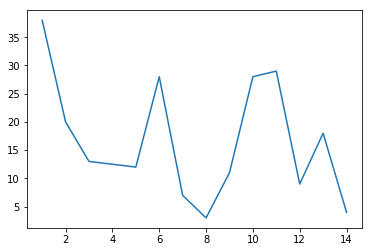

In [12]:
data.Category.value_counts().sort_index().plot()

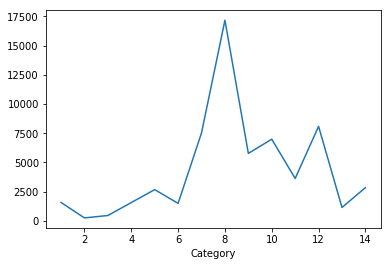

In [13]:
%matplotlib inline
data.groupby(["Category"])["Bill_Amount"].mean().plot()

In [14]:
data.set_index("Category").T.head()

Category,11,6,8,13,9,9,10,10,11,8,...,13,10,9,6,6,2,6,2,1,11
User_id,9123456794,9999999978,9123456782,9999999975,9123456790,9123456789,9123456794,9123456798,9123456799,9123456782,...,9999999974,9999999982,9999999982,9999999983,9999999983,9999999978,9999999983,9999999976,9999999984,9999999989
Product,4,NaN,8,NaN,1,8,7,1,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ordered_Date,2018-01-01 00:00:00,2018-01-04 00:00:00,2018-01-10 00:00:00,2018-01-12 00:00:00,2018-01-21 00:00:00,2018-01-21 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-27 00:00:00,2018-01-28 00:00:00,...,2018-12-13 00:00:00,2018-12-14 00:00:00,2018-12-15 00:00:00,2018-12-16 00:00:00,2018-12-17 00:00:00,2018-12-17 00:00:00,2018-12-18 00:00:00,2018-12-30 00:00:00,2018-12-31 00:00:00,05-04-218
Ordered_Time,21:30:00,22:55:00,14:12:00,10:10:00,13:40:00,15:30:00,13:40:00,13:35:00,17:45:00,18:25:00,...,12:45:00,12:45:00,11:10:00,20:25:00,10:25:00,19:00:00,08:55:00,18:30:00,18:55:32,21:00:00
Bill_Amount,2000,2650,25000,750,8700,1500,22000,2200,1400,20000,...,466,1300,1050,400,500,450,750,280,1560,1500


In [15]:
data_2=data.loc[:,["User_id","Category","Bill_Amount","Income"]]
print(data_2.head())
#data_2=data_2.set_index("Category").T

      User_id  Category  Bill_Amount   Income
0  9123456794        11         2000  45000.0
1  9999999978         6         2650  22000.0
2  9123456782         8        25000  50000.0
3  9999999975        13          750  23000.0
4  9123456790         9         8700  60000.0


In [16]:
data_2.Income.value_counts().sort_index()

6000.00       6
15000.00      1
16000.00      6
20000.00      6
22000.00     12
23000.00     14
25000.00     15
28000.00      2
30000.00     46
30359.09     31
35000.00      3
37000.00      8
38000.00      2
40000.00      1
42000.00      4
45000.00     30
50000.00     20
60000.00      5
75000.00      3
85000.00      3
100000.00     2
Name: Income, dtype: int64

In [17]:
data_2["Income_cat"]=data.Income
print(data_2.head())
#data_2.Income_cat.loc[data_2.Income<=50000]=0
#data_2.Income_cat.loc[data_2.Income>50000]=1
#data_2.Income_cat=data_2.Income_cat.astype(int)
#data_2.head()

      User_id  Category  Bill_Amount   Income  Income_cat
0  9123456794        11         2000  45000.0     45000.0
1  9999999978         6         2650  22000.0     22000.0
2  9123456782         8        25000  50000.0     50000.0
3  9999999975        13          750  23000.0     23000.0
4  9123456790         9         8700  60000.0     60000.0


In [18]:
for i in range(0,len(data_2)):
    if data_2.Income.iloc[i] <= 25000:
        data_2.Income_cat.iloc[i]="Lower"
    elif data_2.Income.iloc[i] <= 45000:
        data_2.Income_cat.iloc[i]="Lower_Middle"
    elif data_2.Income.iloc[i] <= 65000:
        data_2.Income_cat.iloc[i]="Upper_Middle"
    elif data_2.Income.iloc[i] > 65000:
        data_2.Income_cat.iloc[i]="High"
        

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
data_2.head()

,User_id,Category,Bill_Amount,Income,Income_cat
0,9123456794,11,2000,45000.0,Lower_Middle
1,9999999978,6,2650,22000.0,Lower
2,9123456782,8,25000,50000.0,Upper_Middle
3,9999999975,13,750,23000.0,Lower
4,9123456790,9,8700,60000.0,Upper_Middle


In [20]:
data_2.Income_cat.iloc[33]

'High'

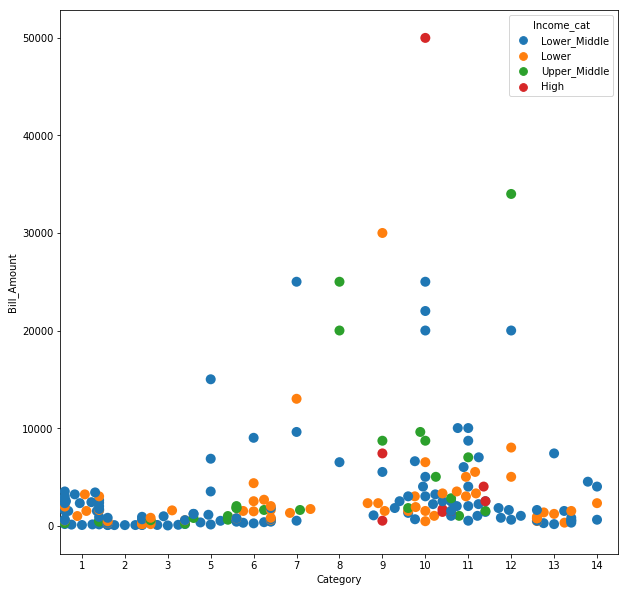

In [21]:
f, ax = plt.subplots(figsize=(10,10
                             ))
sns.swarmplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat,size=10)

In [22]:
#sns.stripplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2, jitter=True,hue=data_2.Income_cat)

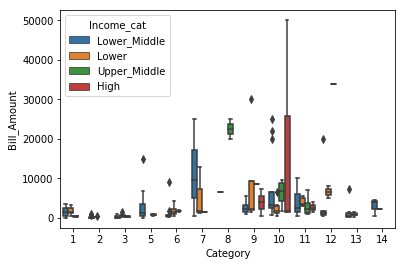

In [23]:
sns.boxplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat,saturation=0.75, width=0.8, dodge=True, fliersize=5 );

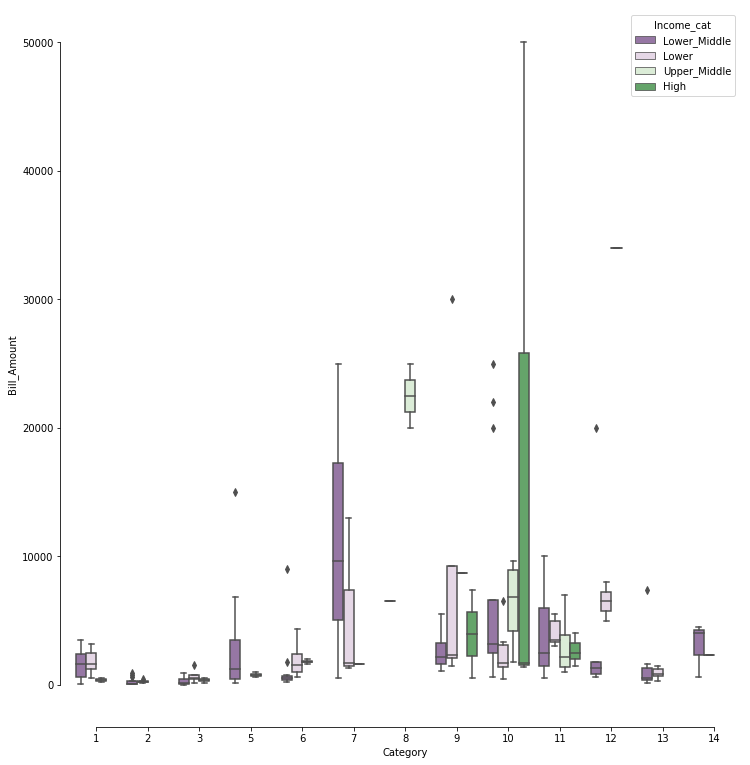

In [24]:
# Draw a nested boxplot 
f, ax = plt.subplots(figsize=(12, 13))
sns.boxplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat, palette="PRGn",orient="v")
sns.despine(offset=10, trim=True)

In [25]:
#f, ax = plt.subplots(figsize=(12, 13))
#sns.violinplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat, palette="PRGn")

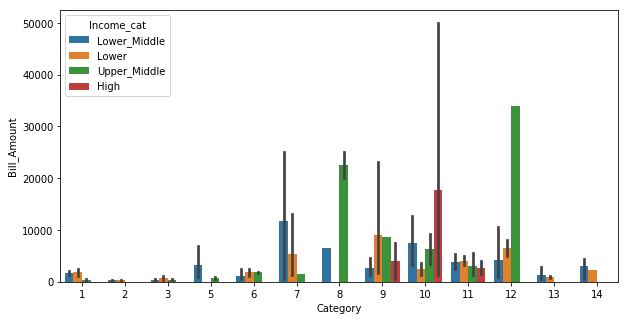

In [26]:
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat)

In [27]:
Users_data=data_2.groupby(["Category"])

In [28]:
for Category,group in Users_data:
    print(Category)
    print(group)
    

1
        User_id  Category  Bill_Amount    Income    Income_cat
16   9123456782         1          400  50000.00  Upper_Middle
26   9999999975         1         1600  23000.00         Lower
35   9999999980         1          980  25000.00         Lower
45   9999999980         1          530  25000.00         Lower
50   9999999987         1         1500  30359.09  Lower_Middle
51   9999999987         1         1500  30359.09  Lower_Middle
59   9123456782         1          550  50000.00  Upper_Middle
68   9999999982         1          888  30000.00  Lower_Middle
72   9999999986         1           60  30359.09  Lower_Middle
75   9999999978         1         3200  22000.00         Lower
92   9999999982         1          100  30000.00  Lower_Middle
100  9999999972         1          120  30000.00  Lower_Middle
103  9999999982         1          156  30000.00  Lower_Middle
109  9999999991         1         2300  42000.00  Lower_Middle
113  9999999991         1         2350  42000.00  Low

In [29]:
data_2.User_id.unique()

array([9123456794, 9999999978, 9123456782, 9999999975, 9123456790,
       9123456789, 9123456798, 9123456799, 9123456781, 9123456793,
       9999999981, 9123456787, 9123456785, 9123456780, 9123456792,
       9999999980, 9123456783, 9123456796, 9123456791, 9999999986,
       9123456786, 9999999985, 9999999988, 9999999973, 9999999991,
       9999999987, 9123456788, 9999999983, 9999999982, 9123456797,
       9999999984, 9123456784, 9000000006, 9999999976, 9999999979,
       9999999972, 9999999971, 9999999974, 9123456795, 9999999990,
       9999999989, 9999999977], dtype=int64)

In [30]:
Users_data.get_group(1)

,User_id,Category,Bill_Amount,Income,Income_cat
16,9123456782,1,400,50000.00,Upper_Middle
26,9999999975,1,1600,23000.00,Lower
35,9999999980,1,980,25000.00,Lower
45,9999999980,1,530,25000.00,Lower
50,9999999987,1,1500,30359.09,Lower_Middle
51,9999999987,1,1500,30359.09,Lower_Middle
59,9123456782,1,550,50000.00,Upper_Middle
68,9999999982,1,888,30000.00,Lower_Middle
72,9999999986,1,60,30359.09,Lower_Middle
75,9999999978,1,3200,22000.00,Lower


In [31]:
Users1_data=data_2.groupby(["User_id"])

In [32]:
for User_id,grp in Users1_data:
    print(User_id)
    print(grp)

9000000006
       User_id  Category  Bill_Amount   Income    Income_cat
86  9000000006        11        10000  35000.0  Lower_Middle
9123456780
        User_id  Category  Bill_Amount   Income    Income_cat
17   9123456780        11        10000  30000.0  Lower_Middle
36   9123456780         8         6500  30000.0  Lower_Middle
40   9123456780        10         3000  30000.0  Lower_Middle
117  9123456780         9         1800  30000.0  Lower_Middle
118  9123456780        11         2500  30000.0  Lower_Middle
122  9123456780        10         3000  30000.0  Lower_Middle
124  9123456780         9         2500  30000.0  Lower_Middle
128  9123456780        11         4000  30000.0  Lower_Middle
155  9123456780        11         7000  30000.0  Lower_Middle
9123456781
        User_id  Category  Bill_Amount   Income    Income_cat
10   9123456781        10        25000  30000.0  Lower_Middle
129  9123456781        11         2500  30000.0  Lower_Middle
9123456782
        User_id  Category  B

In [33]:
print(Users1_data.keys)
print(Users1_data.groups.keys())

['User_id']
dict_keys([9000000006, 9123456780, 9123456781, 9123456782, 9123456783, 9123456784, 9123456785, 9123456786, 9123456787, 9123456788, 9123456789, 9123456790, 9123456791, 9123456792, 9123456793, 9123456794, 9123456795, 9123456796, 9123456797, 9123456798, 9123456799, 9999999971, 9999999972, 9999999973, 9999999974, 9999999975, 9999999976, 9999999977, 9999999978, 9999999979, 9999999980, 9999999981, 9999999982, 9999999983, 9999999984, 9999999985, 9999999986, 9999999987, 9999999988, 9999999989, 9999999990, 9999999991])


In [34]:
list_1=list(Users1_data.groups.keys())
new_df=Users1_data.mean()
new_df.head()
new_df.columns

Index(['Category', 'Bill_Amount', 'Income'], dtype='object')

In [35]:
#f, ax = plt.subplots(figsize=(10,5))
#sns.barplot(x=new_df.Category, y=new_df.Bill_Amount,data=new_df,size=10)

In [36]:
Users2_data=data_2.groupby(["User_id","Category"])
type(Users2_data)
print(Users2_data.keys)

['User_id', 'Category']


In [37]:
for User_id,grp in Users2_data:
    print(User_id)
    print(grp)

(9000000006, 11)
       User_id  Category  Bill_Amount   Income    Income_cat
86  9000000006        11        10000  35000.0  Lower_Middle
(9123456780, 8)
       User_id  Category  Bill_Amount   Income    Income_cat
36  9123456780         8         6500  30000.0  Lower_Middle
(9123456780, 9)
        User_id  Category  Bill_Amount   Income    Income_cat
117  9123456780         9         1800  30000.0  Lower_Middle
124  9123456780         9         2500  30000.0  Lower_Middle
(9123456780, 10)
        User_id  Category  Bill_Amount   Income    Income_cat
40   9123456780        10         3000  30000.0  Lower_Middle
122  9123456780        10         3000  30000.0  Lower_Middle
(9123456780, 11)
        User_id  Category  Bill_Amount   Income    Income_cat
17   9123456780        11        10000  30000.0  Lower_Middle
118  9123456780        11         2500  30000.0  Lower_Middle
128  9123456780        11         4000  30000.0  Lower_Middle
155  9123456780        11         7000  30000.0  Lowe

176  9999999978        13          900  22000.0      Lower
(9999999979, 2)
        User_id  Category  Bill_Amount  Income Income_cat
127  9999999979         2          170  6000.0      Lower
130  9999999979         2          289  6000.0      Lower
(9999999979, 10)
        User_id  Category  Bill_Amount  Income Income_cat
133  9999999979        10          450  6000.0      Lower
(9999999979, 13)
        User_id  Category  Bill_Amount  Income Income_cat
97   9999999979        13         1200  6000.0      Lower
137  9999999979        13         1350  6000.0      Lower
138  9999999979        13         1500  6000.0      Lower
(9999999980, 1)
       User_id  Category  Bill_Amount   Income Income_cat
35  9999999980         1          980  25000.0      Lower
45  9999999980         1          530  25000.0      Lower
(9999999980, 3)
        User_id  Category  Bill_Amount   Income Income_cat
104  9999999980         3          440  25000.0      Lower
(9999999980, 6)
       User_id  Category  Bil

113  9999999991         1         2350  42000.0  Lower_Middle
(9999999991, 5)
       User_id  Category  Bill_Amount   Income    Income_cat
42  9999999991         5          110  42000.0  Lower_Middle
43  9999999991         5         1110  42000.0  Lower_Middle


In [38]:
Users2_data.groups.keys()


dict_keys([(9000000006, 11), (9123456780, 8), (9123456780, 9), (9123456780, 10), (9123456780, 11), (9123456781, 10), (9123456781, 11), (9123456782, 1), (9123456782, 5), (9123456782, 6), (9123456782, 8), (9123456782, 10), (9123456782, 11), (9123456782, 12), (9123456783, 6), (9123456783, 7), (9123456783, 9), (9123456783, 10), (9123456783, 11), (9123456783, 12), (9123456783, 13), (9123456783, 14), (9123456784, 10), (9123456784, 11), (9123456785, 9), (9123456785, 10), (9123456785, 11), (9123456786, 9), (9123456786, 10), (9123456786, 11), (9123456787, 9), (9123456787, 10), (9123456787, 11), (9123456788, 11), (9123456789, 9), (9123456789, 10), (9123456789, 11), (9123456790, 9), (9123456790, 10), (9123456790, 11), (9123456791, 9), (9123456791, 10), (9123456791, 11), (9123456792, 10), (9123456792, 11), (9123456793, 10), (9123456793, 11), (9123456794, 10), (9123456794, 11), (9123456795, 10), (9123456795, 11), (9123456796, 10), (9123456796, 11), (9123456797, 10), (9123456797, 11), (9123456798, 1

In [39]:
p=Users2_data.mean()
print(type(p))
p.head()

<class 'pandas.core.frame.DataFrame'>


Bill_Amount   Income
User_id    Category                      
9000000006 11            10000.0  35000.0
9123456780 8              6500.0  30000.0
           9              2150.0  30000.0
           10             3000.0  30000.0
           11             5875.0  30000.0

In [40]:
print(p.columns)

Index(['Bill_Amount', 'Income'], dtype='object')


In [41]:
print(Users2_data.keys)
Users2_data.keys[1]
#Users2_data.groups

['User_id', 'Category']


'Category'

In [42]:
Users2_data.get_group((9000000006,11))

,User_id,Category,Bill_Amount,Income,Income_cat
86,9000000006,11,10000,35000.0,Lower_Middle


In [43]:
keys=list(Users2_data.groups.keys())
keys

[(9000000006, 11),
 (9123456780, 8),
 (9123456780, 9),
 (9123456780, 10),
 (9123456780, 11),
 (9123456781, 10),
 (9123456781, 11),
 (9123456782, 1),
 (9123456782, 5),
 (9123456782, 6),
 (9123456782, 8),
 (9123456782, 10),
 (9123456782, 11),
 (9123456782, 12),
 (9123456783, 6),
 (9123456783, 7),
 (9123456783, 9),
 (9123456783, 10),
 (9123456783, 11),
 (9123456783, 12),
 (9123456783, 13),
 (9123456783, 14),
 (9123456784, 10),
 (9123456784, 11),
 (9123456785, 9),
 (9123456785, 10),
 (9123456785, 11),
 (9123456786, 9),
 (9123456786, 10),
 (9123456786, 11),
 (9123456787, 9),
 (9123456787, 10),
 (9123456787, 11),
 (9123456788, 11),
 (9123456789, 9),
 (9123456789, 10),
 (9123456789, 11),
 (9123456790, 9),
 (9123456790, 10),
 (9123456790, 11),
 (9123456791, 9),
 (9123456791, 10),
 (9123456791, 11),
 (9123456792, 10),
 (9123456792, 11),
 (9123456793, 10),
 (9123456793, 11),
 (9123456794, 10),
 (9123456794, 11),
 (9123456795, 10),
 (9123456795, 11),
 (9123456796, 10),
 (9123456796, 11),
 (912345

In [44]:
keys[0]

(9000000006, 11)

In [45]:
[x[1] for x in keys]

[11,
 8,
 9,
 10,
 11,
 10,
 11,
 1,
 5,
 6,
 8,
 10,
 11,
 12,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 7,
 1,
 2,
 3,
 10,
 13,
 1,
 2,
 3,
 6,
 7,
 13,
 1,
 6,
 13,
 1,
 2,
 3,
 6,
 13,
 1,
 2,
 3,
 6,
 7,
 10,
 12,
 13,
 2,
 10,
 13,
 1,
 3,
 6,
 9,
 2,
 3,
 7,
 12,
 14,
 1,
 2,
 3,
 5,
 6,
 9,
 10,
 11,
 13,
 6,
 1,
 2,
 1,
 3,
 5,
 7,
 1,
 13,
 1,
 2,
 6,
 10,
 11,
 14,
 5,
 10,
 11,
 2,
 1,
 5]

In [46]:
p_df=pd.DataFrame()
for key in keys:
    p_df=p_df.append(Users2_data.get_group(key))

print(p_df)

    

        User_id  Category  Bill_Amount     Income    Income_cat
86   9000000006        11        10000   35000.00  Lower_Middle
36   9123456780         8         6500   30000.00  Lower_Middle
117  9123456780         9         1800   30000.00  Lower_Middle
124  9123456780         9         2500   30000.00  Lower_Middle
40   9123456780        10         3000   30000.00  Lower_Middle
122  9123456780        10         3000   30000.00  Lower_Middle
17   9123456780        11        10000   30000.00  Lower_Middle
118  9123456780        11         2500   30000.00  Lower_Middle
128  9123456780        11         4000   30000.00  Lower_Middle
155  9123456780        11         7000   30000.00  Lower_Middle
10   9123456781        10        25000   30000.00  Lower_Middle
129  9123456781        11         2500   30000.00  Lower_Middle
16   9123456782         1          400   50000.00  Upper_Middle
59   9123456782         1          550   50000.00  Upper_Middle
120  9123456782         5          600  

In [47]:
p_df.head()

,User_id,Category,Bill_Amount,Income,Income_cat
86,9000000006,11,10000,35000.0,Lower_Middle
36,9123456780,8,6500,30000.0,Lower_Middle
117,9123456780,9,1800,30000.0,Lower_Middle
124,9123456780,9,2500,30000.0,Lower_Middle
40,9123456780,10,3000,30000.0,Lower_Middle


In [48]:
p_df["Mean_Bill_Amount"]=""
cat=p_df.Category.unique()
print(cat)
p_df.head()

[11  8  9 10  1  5  6 12  7 13 14  2  3]


,User_id,Category,Bill_Amount,Income,Income_cat,Mean_Bill_Amount
86,9000000006,11,10000,35000.0,Lower_Middle,
36,9123456780,8,6500,30000.0,Lower_Middle,
117,9123456780,9,1800,30000.0,Lower_Middle,
124,9123456780,9,2500,30000.0,Lower_Middle,
40,9123456780,10,3000,30000.0,Lower_Middle,


In [49]:
#p_df.duplicated(p_df.groupby(["User_id","Category"]),keep=False)

#np.where(p_df.duplicated(["User_id","Category"],keep=False).apply(lambda x: tuple(x.index)).tolist())

In [136]:
duplicate_df=p_df.groupby(["User_id","Category"]).apply(lambda x: list(x.index)).tolist()
duplicate_df

[[86],
 [36],
 [117, 124],
 [40, 122],
 [17, 118, 128, 155],
 [10],
 [129],
 [16, 59],
 [120],
 [27, 47, 58, 157],
 [2, 9],
 [156],
 [131],
 [144],
 [25],
 [73, 106],
 [102],
 [98],
 [93, 94, 105],
 [81, 145, 147, 150, 184, 185],
 [23, 24, 85, 154, 200],
 [78, 91],
 [70],
 [134],
 [15],
 [18],
 [136],
 [33],
 [163],
 [101],
 [57],
 [14],
 [44],
 [56],
 [5],
 [63],
 [62],
 [4],
 [19],
 [34],
 [132],
 [115],
 [30],
 [121],
 [20],
 [54],
 [11],
 [6],
 [0],
 [153],
 [149],
 [28],
 [49],
 [123],
 [66],
 [7],
 [46],
 [13],
 [8],
 [141],
 [100, 135, 158, 178, 192, 198, 208],
 [116],
 [189],
 [39],
 [173],
 [190],
 [207],
 [179],
 [161, 177],
 [143],
 [210],
 [26],
 [21, 182],
 [3],
 [160, 181, 183, 199, 206],
 [152, 217],
 [90, 197],
 [191],
 [193],
 [75, 188, 205],
 [215],
 [195],
 [1, 76],
 [159],
 [110, 142],
 [186],
 [176],
 [127, 130],
 [133],
 [97, 137, 138],
 [35, 45],
 [104],
 [29, 55, 65],
 [22],
 [12, 194],
 [187],
 [180],
 [126],
 [125],
 [68, 92, 103, 151, 175],
 [67, 79, 88, 95],

In [140]:
print(type(duplicate_df[0:10]))
duplicate_df[0:10]
#duplicate_df[[2],[2]]

<class 'list'>


[[86],
 [36],
 [117, 124],
 [40, 122],
 [17, 118, 128, 155],
 [10],
 [129],
 [16, 59],
 [120],
 [27, 47, 58, 157]]

In [125]:
#df_=np.array(duplicate_df)
#df_

In [55]:
print(type(duplicate_df))

<class 'list'>


In [56]:
mean_=p_df.groupby(["User_id","Category"], as_index=False).apply(lambda x : np.mean(tuple(p_df.Bill_Amount[x.index]))).tolist()
len(mean_)

129

In [57]:
p_df.groupby(["User_id","Category"], as_index=False).apply(lambda x : np.mean(tuple(p_df.Bill_Amount[x.index]))).tolist()

[10000.0,
 6500.0,
 2150.0,
 3000.0,
 5875.0,
 25000.0,
 2500.0,
 475.0,
 600.0,
 1800.0,
 22500.0,
 5000.0,
 1500.0,
 34000.0,
 1800.0,
 17300.0,
 5500.0,
 5000.0,
 3566.6666666666665,
 4300.0,
 2370.0,
 4250.0,
 9600.0,
 1000.0,
 30000.0,
 3300.0,
 3000.0,
 500.0,
 50000.0,
 2500.0,
 7400.0,
 1400.0,
 4000.0,
 5000.0,
 1500.0,
 6500.0,
 5500.0,
 8700.0,
 8700.0,
 7000.0,
 2300.0,
 3000.0,
 3300.0,
 1800.0,
 2800.0,
 2500.0,
 2200.0,
 22000.0,
 2000.0,
 6600.0,
 6000.0,
 20000.0,
 2500.0,
 1500.0,
 3500.0,
 2200.0,
 2000.0,
 4000.0,
 1400.0,
 500.0,
 2502.8571428571427,
 150.0,
 800.0,
 1900.0,
 750.0,
 1500.0,
 260.0,
 150.0,
 1750.0,
 1299.0,
 466.0,
 1600.0,
 2050.0,
 750.0,
 1693.6,
 230.0,
 757.5,
 750.0,
 300.0,
 2716.6666666666665,
 450.0,
 1560.0,
 3500.0,
 13000.0,
 1249.5,
 5000.0,
 900.0,
 229.5,
 450.0,
 1350.0,
 755.0,
 440.0,
 953.3333333333334,
 2300.0,
 250.0,
 550.0,
 1699.0,
 8000.0,
 2300.0,
 465.4,
 85.25,
 79.75,
 8100.0,
 509.75,
 1050.0,
 975.0,
 500.0,
 233.333

In [78]:
mean_[128]

610.0

In [154]:
p=[(e,duplicate_df.index(e))for i,e in enumerate(duplicate_df)if e in duplicate_df]
p

[([86], 0),
 ([36], 1),
 ([117, 124], 2),
 ([40, 122], 3),
 ([17, 118, 128, 155], 4),
 ([10], 5),
 ([129], 6),
 ([16, 59], 7),
 ([120], 8),
 ([27, 47, 58, 157], 9),
 ([2, 9], 10),
 ([156], 11),
 ([131], 12),
 ([144], 13),
 ([25], 14),
 ([73, 106], 15),
 ([102], 16),
 ([98], 17),
 ([93, 94, 105], 18),
 ([81, 145, 147, 150, 184, 185], 19),
 ([23, 24, 85, 154, 200], 20),
 ([78, 91], 21),
 ([70], 22),
 ([134], 23),
 ([15], 24),
 ([18], 25),
 ([136], 26),
 ([33], 27),
 ([163], 28),
 ([101], 29),
 ([57], 30),
 ([14], 31),
 ([44], 32),
 ([56], 33),
 ([5], 34),
 ([63], 35),
 ([62], 36),
 ([4], 37),
 ([19], 38),
 ([34], 39),
 ([132], 40),
 ([115], 41),
 ([30], 42),
 ([121], 43),
 ([20], 44),
 ([54], 45),
 ([11], 46),
 ([6], 47),
 ([0], 48),
 ([153], 49),
 ([149], 50),
 ([28], 51),
 ([49], 52),
 ([123], 53),
 ([66], 54),
 ([7], 55),
 ([46], 56),
 ([13], 57),
 ([8], 58),
 ([141], 59),
 ([100, 135, 158, 178, 192, 198, 208], 60),
 ([116], 61),
 ([189], 62),
 ([39], 63),
 ([173], 64),
 ([190], 65),


In [ ]:
p.apply()

In [ ]:
for 

In [157]:
for i in range(len(duplicate_df)):
    for j in range(len(duplicate_df[i])):
        print(duplicate_df[i][j])
        p_df.Mean_Bill_Amount.iloc[duplicate_df[i][j]]=mean_[duplicate_df.index(duplicate_df[i][j])]

86


ValueError: 86 is not in list

In [148]:
p_df.head()

,User_id,Category,Bill_Amount,Income,Income_cat,Mean_Bill_Amount
86,9000000006,11,10000,35000.0,Lower_Middle,2000
36,9123456780,8,6500,30000.0,Lower_Middle,3500
117,9123456780,9,1800,30000.0,Lower_Middle,22500
124,9123456780,9,2500,30000.0,Lower_Middle,750
40,9123456780,10,3000,30000.0,Lower_Middle,8700


In [119]:
for i,e in enumerate(duplicate_df):
    p_df.Mean_Bill_Amount.iloc[[len(k) for k in duplicate_df]]=mean_[i]

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
p_df.Mean_Bill_Amount.iloc[[e[a]for a in i.iteritem()]]=mean_[i]

In [82]:
for i,e in enumerate(duplicate_df):
    print(i)
    print(e)
    length=len(e)-1   
    #print(length)

0
(86,)
1
(36,)
2
(117, 124)
3
(40, 122)
4
(17, 118, 128, 155)
5
(10,)
6
(129,)
7
(16, 59)
8
(120,)
9
(27, 47, 58, 157)
10
(2, 9)
11
(156,)
12
(131,)
13
(144,)
14
(25,)
15
(73, 106)
16
(102,)
17
(98,)
18
(93, 94, 105)
19
(81, 145, 147, 150, 184, 185)
20
(23, 24, 85, 154, 200)
21
(78, 91)
22
(70,)
23
(134,)
24
(15,)
25
(18,)
26
(136,)
27
(33,)
28
(163,)
29
(101,)
30
(57,)
31
(14,)
32
(44,)
33
(56,)
34
(5,)
35
(63,)
36
(62,)
37
(4,)
38
(19,)
39
(34,)
40
(132,)
41
(115,)
42
(30,)
43
(121,)
44
(20,)
45
(54,)
46
(11,)
47
(6,)
48
(0,)
49
(153,)
50
(149,)
51
(28,)
52
(49,)
53
(123,)
54
(66,)
55
(7,)
56
(46,)
57
(13,)
58
(8,)
59
(141,)
60
(100, 135, 158, 178, 192, 198, 208)
61
(116,)
62
(189,)
63
(39,)
64
(173,)
65
(190,)
66
(207,)
67
(179,)
68
(161, 177)
69
(143,)
70
(210,)
71
(26,)
72
(21, 182)
73
(3,)
74
(160, 181, 183, 199, 206)
75
(152, 217)
76
(90, 197)
77
(191,)
78
(193,)
79
(75, 188, 205)
80
(215,)
81
(195,)
82
(1, 76)
83
(159,)
84
(110, 142)
85
(186,)
86
(176,)
87
(127, 130)
88
(133,)

In [102]:
map(lambda x: x[0], a)



for i in range(0,len(duplicate_df)):
    p_df.Mean_Bill_Amount.iloc[[len(k) for k in duplicate_df]]=mean_[i]
        
        
    
        

C:\Users\Tester\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
[x for x, y in enumerate(tuple_list) if y[0] == 7]

In [73]:
for i,e in enumerate(duplicate_df):
    length=len(e)-1   
    #print(length)
    for a in e[i].items():
        print(a)
    #p_df.Mean_Bill_Amount.iloc[[e[a]for a in i.iteritem()]]=mean_[i]

AttributeError: 'int' object has no attribute 'items'

In [ ]:
for i in duplicate_df:
    print(i)

In [ ]:
"""for key in keys:
    for row in p_df.get_group(key).iterrows():
        #p_df["Mean_Bill_Amount"].iloc[int(row[0])]=int(row['Bill_Amount']).mean()
        print(row)"""
      



In [ ]:
mean_amount=[]
for i in range(0,len(p.Bill_Amount)):
    mean_amount.append(p.Bill_Amount.iloc[i])

print(mean_amount)
#p_df.iloc["Mean_Bill_Amount"]

In [ ]:
"""for x in p_df.User_id.items():
    for c in p_df.Category.items():
        p_df.Mean_Bill_Amount.loc[x[0]]=p_df.Bill_Amount.iloc[x[0]].mean()"""


In [ ]:
Mean_Bill_Amount_=p_df[["User_id","Category","Bill_Amount"]].mean(axis=0)
Mean_Bill_Amount_ 

In [ ]:
Mean_Bill_Amount=[]
for user in Users2_data.User_id:
    for cat in Users2_data.Category:
        Mean_Bill_Amount.append(Users2_data.Bill_Amount.mean())


In [ ]:
print(Mean_Bill_Amount[5])
type(Mean_Bill_Amount)
Mean_Bill_Amount=pd.DataFrame(Mean_Bill_Amount)
type(Mean_Bill_Amount)

In [ ]:
Mean_Bill_Amount.head(1)
Mean_Bill_Amount.shape

In [ ]:
#Mean_Bill_Amount.T

In [ ]:
for user,cat in Mean_Bill_Amount:
    print(user)
    print(cat)

In [ ]:
#impute_grps = p_df.pivot_table(values=["Bill_Amount"], index=["User_id","Category"], aggfunc=np.mean)
#print(impute_grps)
#print(impute_grps.columns)

In [ ]:
for row_index,x, in keys:
    for index in range(0,len(p_df):
                       new_df=[p_df[(Users2_data.User_id.iloc[index] == row_index) & (Users2_data.Category.iloc[index] == x),Users2_data["Bill_Amount"].iloc["index"].mean()] )] 

In [ ]:
 #df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

In [ ]:
new_df=[p_df.loc[(Users2_data["User_id"]== x[0]) & (Users2_data["Category"]== x[1]),Users2_data["Bill_Amount"].mean()] for x in keys]